## Chapter 2: The Truth about Linear Regression

---

### 2.1

1. Write the expected squared error of a linear predictor with slopes $\vec{b}$ and intercept $b_0$ as a function of those coefficients.
2. Find the derivatives of the expected squared error with respect to all the coefficients.
3. Show that when we set all the derivatives to zero, the solutions are Eq. 2.5 and 2.6.

Solution:

Expected squared error of a linear predictor is given as follows:

$$
MSE = E[(y - \vec{X}\cdot\vec{b} - b_0)^2]
$$

where $\hat{b}$ denotes the slopes and $b_0$ denotes intercept

$$
\begin{align}
MSE &= E[(y - \vec{X}\cdot\vec{b} - b_0)^2] \\
    &= E[(y - \vec{X}\cdot\vec{b} - b_0)^T (y - \vec{X}\cdot\vec{b} - b_0)] \tag{since $E[X^2] = E[X^T X]$} \\
    &= E[(y^T y + \vec{b}^T \vec{X}^T \vec{X} \vec{b} + b_0^2 - 2\vec{b}^T \vec{X}^T y + 2\vec{b}^T \vec{X}^T b_0 - 2y^T b_0)] \tag{1} \label{eq:reduced_mse} \\
\end{align}
$$

Taking derivates of MSE defined by equation $\eqref{eq:reduced_mse}$ w.r.t all coefficients $b_0$, $\vec{b}$

$$
\begin{align}
\frac{\partial MSE}{\partial b_0} &= E[(2b_0 + 2\vec{b}^T \vec{X} - 2y^T)] \\
                                  &= 2b_0 + 2\vec{b}E[\vec{X}] - 2E[y] \tag{2} \label{eq:partial_b0} \\
\end{align}
$$

$$
\begin{align}
\frac{\partial MSE}{\partial \vec{b}} &= E[(2\vec{X}^T\vec{X}\vec{b} - 2\vec{X}^T y + 2\vec{X}^T b_0)] \\
                                      &= 2\vec{b}E[\vec{X}^T \vec{X}] - 2E[\vec{X}y] + 2b_0E[\vec{X}] \tag{3} \label{eq:partial_b} \\
\end{align}
$$

Equating the partial derivates defined by the equations $\eqref{eq:partial_b0}$ and $\eqref{eq:partial_b}$ to zero

$$
2\beta_0 + 2\beta E[\vec{X}] - 2E[y] = 0 \\
\beta_0 = E[y] - \beta E[\vec{X}] \tag{4} \label{eq:beta_0} \\
2\beta E[\vec{X}^T \vec{X}] - 2E[\vec{X}y] + 2\beta_0 E[\vec{X}] = 0
$$

Substituting $\beta_0$ in above equation

$$
\beta E[\vec{X}^T \vec{X}] - E[\vec{X}y] + (E[y] - \beta E[\vec{X}]) E[\vec{X}] = 0 \\
\beta E[\vec{X}^T \vec{X}] - E[\vec{X}y] + E[y]E[\vec{X}] - \beta E^2[\vec{X}] = 0 \\
\beta (E[\vec{X}^T \vec{X}] - E^2[\vec{X}]) = E[\vec{X}y] - E[\vec{X}]E[y] \\
$$

$$
\begin{align}
\beta &= \frac{E[\vec{X}y] - E[\vec{X}]E[y]}{E[\vec{X}^T \vec{X}] - E^2[\vec{X}]} \\
      &= \frac{COV(\vec{X}, y)}{COV(\vec{X}, \vec{X})} \\
      &= \frac{COV(\vec{X}, y)}{VAR(\vec{X})} \tag{since $COV(X, X) = VAR(X)$} \\
      &= v^{-1}COV(\vec{X}, y) \tag{where $v = VAR(\vec{X})$}
\end{align}
$$


### 2.2
Show that the expected error of the optimal linear predictor, $\large E[Y - \vec{X}\cdot\beta]$, is zero.

Solution:

Need to prove that for optimal linear predictor, the following expression

$$
E[Y - \vec{X}\cdot\beta] = 0 \\
E[e] = 0
$$

where $e = Y - \vec{X}\cdot\beta$ and denotes the residual

$$
\begin{align}
e &= Y - \vec{X}\cdot\beta \\
  &= Y - \vec{X}(\vec{X}^T \vec{X})^{-1} \vec{X}^T Y \tag{since $\beta = (\vec{X}^T \vec{X})^{-1} \vec{X}^T$} \\
  &= Y - HY \tag{where $H = \vec{X}(\vec{X}^T \vec{X})^{-1} \vec{X}^T$} \\
  &= IY - HY \\
  &= (I - H)Y \tag{1} \label{eq:reduced_residual} \\
\end{align}
$$

Taking expectation of equation $\eqref{eq:reduced_residual}$

$$
\begin{align}
E[e] &= E[(I - H)Y] \\
     &= (I - H)E[Y] \\
     &= (I - H)(\vec{X}\beta + E[\epsilon]) \tag{since $Y = \vec{X}\beta + \epsilon$ for OLS} \\
     &= (I - H)(\vec{X}\beta) \tag{since $E[\epsilon] = 0$} \\
     &= \vec{X}\beta - H\vec{X}\beta \\
     &= \vec{X}\beta - \vec{X}(\vec{X}^T \vec{X})^{-1} \vec{X}^T \vec{X}\beta \\
     &= \vec{X}\beta - \vec{X}I\beta \\
     &= \vec{X}\beta - \vec{X}\beta \\
     &= 0
\end{align}
$$

### 2.3

Convince yourself that if the real regression function is linear, $\beta$ does not depend on the marginal distribution of X. You may want to start with the case of one predictor variable.


Solution:

$$
\beta = \frac{COV(X, Y)}{VAR(X)} = \frac{COV(X, Y)}{COV(X, X)} = \frac{COV(X, X\hat\beta + \epsilon)}{COV(X, X)} \tag{since $Y = X\hat\beta + \epsilon$} \\
$$

$$
\begin{align}
\beta &= \frac{E[X(X\hat\beta + \epsilon)] - E[X]E[X\hat\beta + \epsilon]}{E[X^2] - E^2[X]} \\
      &= \frac{E[X^2 \hat\beta + X\epsilon] - E[X]E[X\hat\beta] - E[X]E[\epsilon]}{E[X^2] - E^2[X]} \\
      &= \frac{\beta E[X^2] + XE[\epsilon] - \hat\beta E[X]E[X] - E[X]E[\epsilon]}{E[X^2] - E^2[X]} \\
      &= \frac{\beta E[X^2] - \hat\beta E[X]E[X]}{E[X^2] - E^2[X]} \tag{since $E[\epsilon] = 0$} \\
      &= \frac{\hat\beta(E[X^2] - E^2[X])}{E[X^2] - E^2[X]} \\
      &= \hat\beta
\end{align}
$$

Hence, $\beta$ (our estimate) is an unbaised esitmate of $\hat\beta$. It does not depend on the marginal distribution of X i.e. independent of X, when regression function $\mu(X)$ is linear.

Visually,

![visual representation of unbaised estimate](fig1.png)

Here, as shown in above diagram, the slope of the linear predictor ($\beta$) remains the same even if you move your X in whatever regions (when $Y$ comes from $X$ i.e. $Y = X\hat\beta + \epsilon$)

### 2.5

Which kind of transformation is superior for the model where $Y |X \sim \mathcal{N}(\sqrt{X}, 1)$?

Solution:
    
For the above model, $Y |X \sim \mathcal{N}(\sqrt{X}, 1)$ implies that $Y = \sqrt{X} + \epsilon$ where $\epsilon \sim \mathcal{N}(0, 1)$ i.e. standard normal distribution.

- Transforming the predictor $X$ would be suitable to preserve the noise from standard normal distribution.
- Transforming the response $Y$ completely changes and disturbs the distribution of noise.

Hence, Transforming $X$ for the above model is superior.


### 2.4 

Run the code from Figure 2.5. Then replicate the plots in Figure 2.6.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
plt.rcParams["figure.figsize"] = (10, 8)
plt.rcParams["font.size"] = 16

In [3]:
rng = np.random.RandomState(123)

x = rng.uniform(size=100)
y = rng.normal(loc=np.log(x), scale=1, size=100)

x = x.reshape(-1, 1)
y = y.reshape(-1, 1)

#### Figure 2.5 from chapter 2:

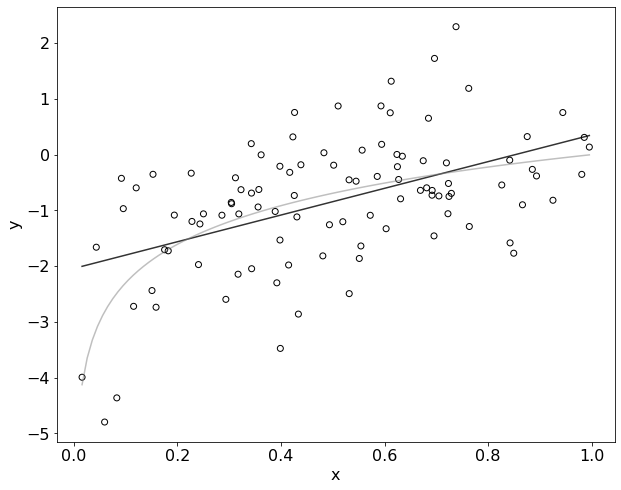

In [4]:
plt.figure(figsize=(10, 8))
plt.scatter(x, y, facecolors='none', edgecolors='black')
xnew = np.linspace(x.min(), x.max(), 100).reshape(-1, 1)
plt.plot(
    xnew, 
    LinearRegression().fit(x, y).predict(xnew), 
    color="black",
    alpha=0.8
)
plt.plot(xnew, np.log(xnew), color="grey", alpha=0.5)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

#### Figure 2.6 from chapter 2:

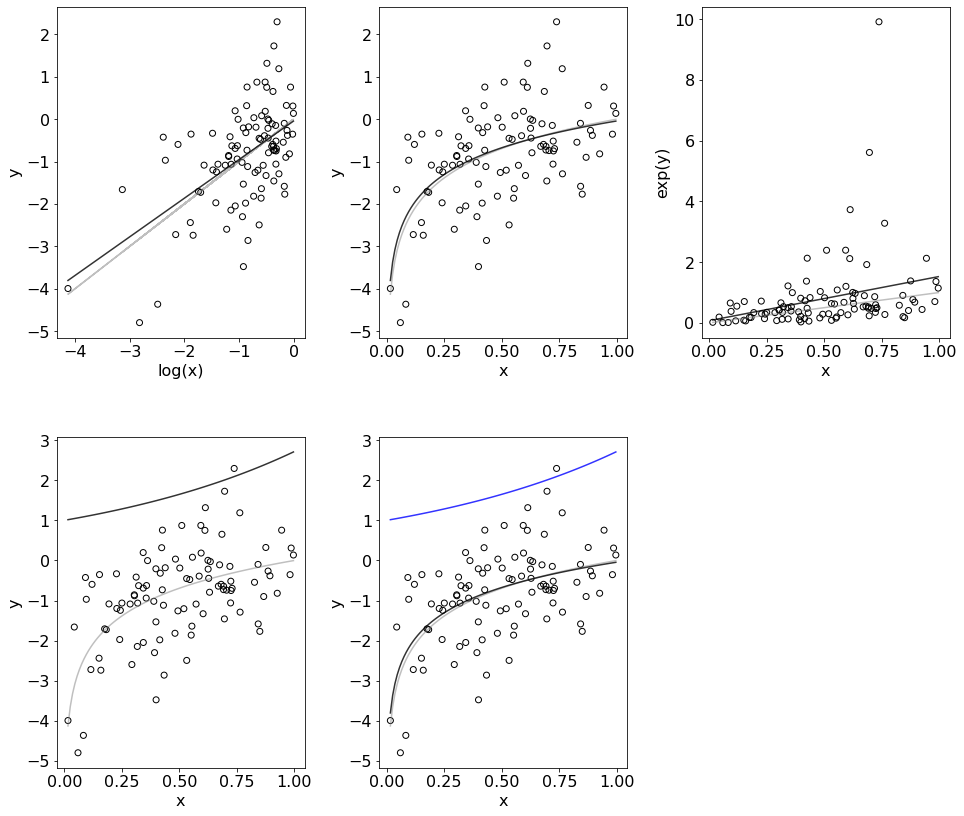

In [9]:
plt.figure(figsize=(16, 14))
grid = plt.GridSpec(2, 3, wspace=0.3, hspace=0.3)

# figure 1 (0, 0)
plt.subplot(grid[0, 0])
xnew = np.linspace(np.log(x).min(), np.log(x).max(), 100).reshape(-1, 1)
plt.scatter(np.log(x), y, facecolors='none', edgecolors='black')
plt.plot(np.log(x), np.log(x), color="grey", alpha=0.5)
plt.plot(xnew, LinearRegression().fit(np.log(x), y).predict(xnew), color="black", alpha=0.8)
plt.xlabel("log(x)")
plt.ylabel("y")

# figure 2 (0, 1)
plt.subplot(grid[0, 1])
xnew = np.linspace(x.min(), x.max(), 100).reshape(-1, 1)
plt.scatter(x, y, facecolors='none', edgecolors='black')
plt.plot(xnew, np.log(xnew), color="grey", alpha=0.5)
plt.plot(
    xnew, 
    LinearRegression().fit(np.log(x), y).predict(np.log(xnew)),
    color="black",
    alpha=0.8
)
plt.xlabel("x")
plt.ylabel("y")

# figure 3 (0, 3)
plt.subplot(grid[0, 2])
xnew = np.linspace(x.min(), x.max(), 100).reshape(-1, 1)
plt.plot(xnew, xnew, color="grey", alpha=0.5)
plt.scatter(x, np.exp(y), facecolors='none', edgecolors='black')
plt.plot(
    xnew, 
    LinearRegression().fit(x, np.exp(y)).predict(xnew), 
    color="black", 
    alpha=0.8
)
plt.xlabel("x")
plt.ylabel("exp(y)")

# figure 4 (1, 0)
plt.subplot(grid[1, 0])
xnew = np.linspace(x.min(), x.max(), 100).reshape(-1, 1)
plt.scatter(x, y, facecolors='none', edgecolors='black')
plt.plot(xnew, np.log(xnew), color="grey", alpha=0.5)
plt.plot(xnew, np.exp(xnew), color="black", alpha=0.8)
plt.xlabel("x")
plt.ylabel("y")

# figure 5 (1, 1)
plt.subplot(grid[1, 1])
xnew = np.linspace(x.min(), x.max(), 100).reshape(-1, 1)
plt.scatter(x, y, facecolors='none', edgecolors='black')
plt.plot(xnew, np.log(xnew), color="grey", alpha=0.5)
plt.plot(
    xnew, 
    LinearRegression().fit(np.log(x), y).predict(np.log(xnew)),
    color="black",
    alpha=0.8
)
plt.plot(xnew, np.exp(xnew), color="blue", alpha=0.8)
plt.xlabel("x")
plt.ylabel("y")

plt.show()